In [43]:
# Import Libraries

import numpy as np  #Linear Algebra
import pandas as pd #Data Processing

from sklearn.preprocessing import LabelEncoder #One-Hot Encoding
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Visualization and Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Reading the data
iris_data = pd.read_csv('iris.csv')

In [46]:
iris_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
# Check few records
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [1]:
# get to know about number of species (classes)
iris_data['outputs'].unique()

NameError: name 'iris_data' is not defined

In [48]:
# if there is any NAN value
iris_data.isnull().values.any()

False

In [49]:
# check the distribution of the class 
iris_data['outputs'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: outputs, dtype: int64

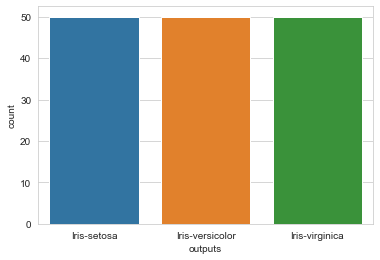

In [50]:
sns.countplot(iris_data['outputs'])

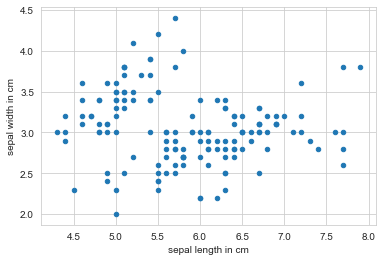

In [51]:
iris_data.plot(kind = 'scatter', x = 'sepal length in cm', y = 'sepal width in cm')

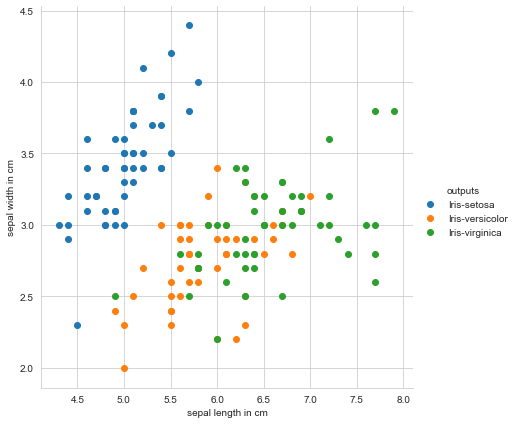

In [54]:
#2--D Plot with colour-coding for each flower type
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='outputs', size=6).map(plt.scatter, 'sepal length in cm', 'sepal width in cm').add_legend()

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


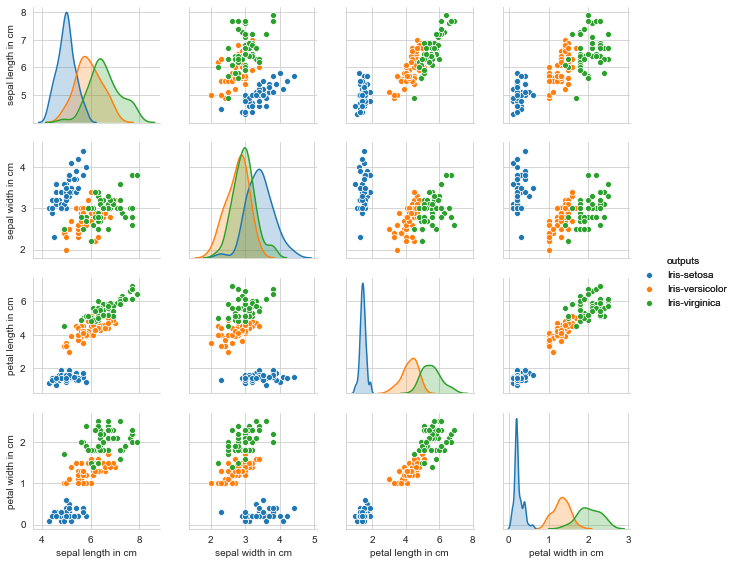

In [55]:
#Pairwise scattter plot: Pair-Plot
sns.pairplot(iris_data, hue='outputs', size=2).add_legend()

1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).

In [57]:
#One Hot Enconding For Different Species // Convert categorical label to numerical

for column in iris_data.columns:
    if iris_data[column].dtype == np.number:
        continue
iris_data[column] = LabelEncoder().fit_transform(iris_data[column])        
    

In [59]:
iris_data.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
outputs                 int32
dtype: object

In [60]:
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
#seperating Features

X = iris_data.drop(['outputs'],axis = 1)
y = iris_data['outputs']

In [62]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: outputs, Length: 150, dtype: int32

In [67]:
#Splitting Dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [68]:
#Selecting different Ks in range [1,12] and choose the one with high accuracy

k_range = list(range(1,12))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [69]:
acc

[1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0]

We can see that with K = 1,2,3,4,9,10,11 we are getting 100 % accuracy, so we are going to select K=1

In [73]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [74]:
metrics.accuracy_score(y_test, y_pred)

1.0